# MA30279 Machine Learning 2 and MA50290 Applied Machine Learning  
# Assessed Coursework 1 (2023-24). CN: 24075
---

**Set:** Thursday 26 October 2023.

**Due:** Thursday 9 November 2023 at 17:00.

**Value:** This assignment is worth 40% of the total assessment for MA30279 (Machine Learning 2) / MA50290 (Applied Machine Learning). In the questions below, the notation **[marks]** indicates the marks available for each part out of a total of 40.

**Grading:** The coursework will be graded as follows: 
- 60% content;
- 40% presentation.

**Submission:** You are expected to upload ONE zipped folder to Moodle containing two files: (1) your final report as a single .ipynb file (i.e. Jupyter Notebook file), containing both the code and the mathematical writeup and (2) a .pdf version of this report. See the markdown tutorial for instructions on how to export your Python notebook to PDF. You are expected to type up your solutions. Handwritten solutions are not accepted. The zipped folder should have no folders inside and should only contain the two files specified above. 

**Conditions:** You should not discuss the details of your work with anyone else. The work which you hand in must be your own. You should be prepared to explain anything which you write to an examiner if asked to do so. In particular, if it is discovered that all or part of your code or your written work has been copied, both parties involved risk a severe penalty and might lose all their marks on the assignment.
You may use any results which have been proved in lectures or on problem sheets, provided you quote them clearly. Cite any sources that you use to complete this assignment.

**GenAI use:** The use of GenAI is not permitted (type A cathegory).

**Support and advice:** Contact the unit convenor via email (tab73@bath.ac.uk), or during office hours (Fridays at 11:15-12:05).

  

**Late submission of coursework:** If there are valid circumstances preventing you from meeting the deadline, your Director of Studies may grant you an extension to the specified submission date, if it is requested before the deadline. Forms to request an extension are available on SAMIS.
- If you submit a piece of work after the submission date, and no extension has been granted, the maximum mark possible will be the pass mark.
- If you submit work more than five working days after the submission date, you will normally receive a mark of 0 (zero), unless you have been granted an extension.

**Academic integrity statement:** Academic misconduct is defined by the University as "the use of unfair means in any examination or assessment procedure". This includes (but is not limited to) cheating, collusion, plagiarism, fabrication, or falsification. The University’s Quality Assurance Code of Practice, [QA53 Examination and Assessment Offences](https://www.bath.ac.uk/publications/qa53-examination-and-assessment-offences/), sets out the consequences of committing an offence and the penalties that might be applied.

## 1. The Iris dataset
---

For this assignment, you will be working with the Iris dataset. It consists of 4 measurements from a sample of 50 flowers from 3 species of Iris. The goal of the assignment is to build a classifier able to predict the correct class (of the 3 Iris species available in the dataset) for a new given measurement.  

Begin by taking a look at the Iris dataset to familiarise yourself with the data.

In [3]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris

# Let's load the data
iris = load_iris()

X = iris['data']
y = iris['target']
names = iris['target_names']

# Let's observe the content of the dataset
print(f"The measured features are:\n{iris['feature_names']} \n")
print(f"The classes of Iris in the dataset are are:\n{names} \n")

print(f"The first 3 measurements are:\n{X[:3]}\n")
print(f"The class identifiers of the first 3 plants are: \n {y[:3]}")
print(f"Which can be translated to classes: \n {names[y[:3]]}")

The measured features are:
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] 

The classes of Iris in the dataset are are:
['setosa' 'versicolor' 'virginica'] 

The first 3 measurements are:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]]

The class identifiers of the first 3 plants are: 
 [0 0 0]
Which can be translated to classes: 
 ['setosa' 'setosa' 'setosa']


We found out that the dataset containts sepal and petal lengths and widths (these are our features), of the Setosa (encoded as zero), Versicolor (encoded as one), and Virginica (encoded as two) species of Iris: therefore, there are three classes in total. In summary, the dataset $(\boldsymbol{x}^{(i)}, y^{(i)})$ consists of 150 datapoints (50 examples for each class); each feature vector $\boldsymbol{x}^{(i)} \in \mathbb{R}^4$, for $i = 1, \ldots, 150$, has legth 4, with corresponding labels $y^{(i)} \in \mathbb{R}$, for $i = 1, \ldots, 150$, which are equal to either 0 (Setosa), 1 (Versicolor) or 2 (Virginica). For example, the first 3 rows of the dataset correspond to the Setosa type flower.

##### Q1. [2] How do these datapoints look like when plotted? Save the sepal and petal measurements separately in two arrays ```X_sepal``` and ```X_petal```. Plot the datapoints using a scatter plot, with sepal lengths on the $x$-axis and sepal widths on the $y$-axis. Similarly, create a separate scatter plot for petal lengths and widths. Add title, legend and axis labels for both scatter plots. 

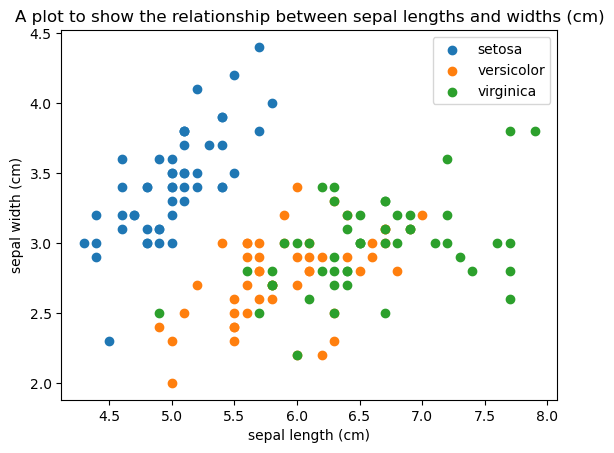

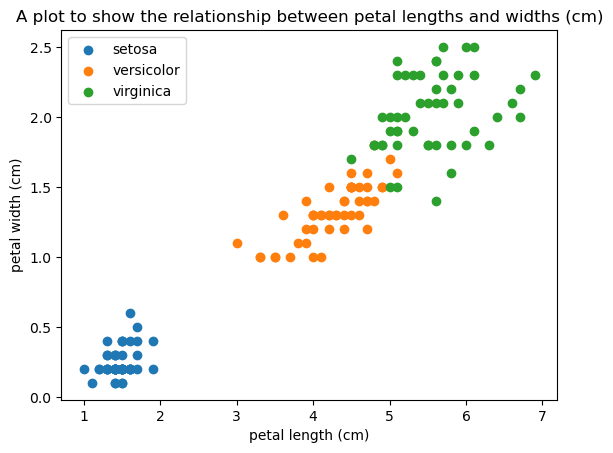

In [4]:
# Define X_sepal and X_petal
### BEGIN SOLUTION (~ 2 lines)
X_sepal = X[:, 0:2]
X_petal = X[:, 2:4]
### END SOLUTION

# Plot sepal length and width by class
### BEGIN SOLUTION (~ 5 lines)
for i in range(3):
    plt.scatter(X_sepal[i*50:(i+1)*50,0], X_sepal[i*50:(i+1)*50,1], label = names[i])
plt.xlabel(iris['feature_names'][0])
plt.ylabel(iris['feature_names'][1])
plt.title('A plot to show the relationship between sepal lengths and widths (cm)')
plt.legend()
plt.show()
### END SOLUTION

# Plot petal length and width by class
### BEGIN SOLUTION (~ 5 lines)
for i in range(3):
    plt.scatter(X_petal[i*50:(i+1)*50,0], X_petal[i*50:(i+1)*50,1], label = names[i])
plt.xlabel(iris['feature_names'][2])
plt.ylabel(iris['feature_names'][3])
plt.title('A plot to show the relationship between petal lengths and widths (cm)')
plt.legend()
plt.show()
### END SOLUTION

##### Q2. [3] For each scatter plot, comment on whether it is possible to separate the three classes using two lines (you can support your answer by drawing such lines, if possible).

#### First plot above: 

The `setosa` class is relatively spacially seperated from `versicolor` and `virginica`, therefore it is possible to draw a straight line to classify `setosa` from `versicolor` and `virginica` (see plot below). `versicolor` and `virginica` are in a spacially distinct cluster from `setosa`. However, there is alot of overlap for the classes`versicolor` and `virginica`. Therefore, it is impossible to draw a line to separate them (no line is attempted on the plot below because it is not possible).

(-0.5, 626.5, 462.5, -0.5)

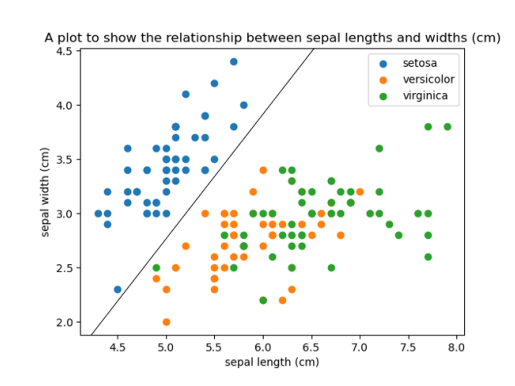

In [10]:
# Supporting answer with drawn lines (note that this plot is only viewable on the PDF)
import matplotlib.image as mpimg 
img = mpimg.imread('SepalDrawnLines.png')
imgplot = plt.imshow(img)
plt.axis('off')

#### Second plot above:

The `setosa` class is very much seperated from `versicolor` and `virginica`. Therefore, it is certinally possible to draw a straight line to classify `setosa` from `versicolor` and `virginica` (see plot below). However, eventhough `versicolor` and `virginica` are in relatively spacially distant clusters, it is not possible to seperate `versicolor` and `virginica` with a singular straight line because there is some overlap. A non-linear line would certinally be needed to seperate `versicolor` and `virginica` for classification (see plot below). 

(-0.5, 608.5, 460.5, -0.5)

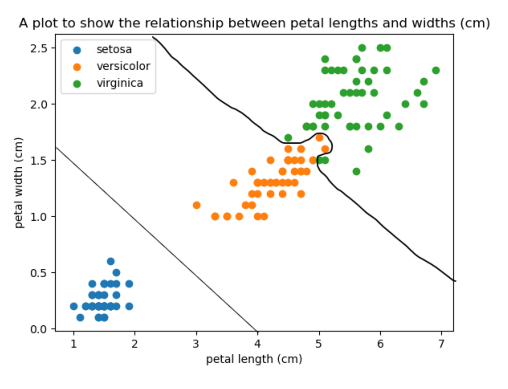

In [11]:
# Supporting answer with drawn lines (note that this plot is only viewable on the PDF)
img = mpimg.imread('PetalDrawnLines.png')
imgplot = plt.imshow(img) 
plt.axis('off')

## 2. Building the model for classification
---

In Chapter 3 of the lecture notes we learned how to go about *binary* classification. However, in the case of the Iris dataset we have 3 classes and the model for binary classication does not apply anymore. In place of the sigmoid function, we will use the following function, denoted by $g: \mathbb{R}^K \rightarrow \mathbb{R}^K$, and defined by:
$$
[g(\boldsymbol{t})]_k = \frac{e^{t_k}}{\sum_{j=1}^K e^{t_j}}
\qquad \text{for } \,  \boldsymbol{t} = (t_k)_{k=1}^K \in \mathbb{R}^K.
\qquad   (1)
$$
where the notation $[\boldsymbol{z}]_k$ denotes the $k$-th component of the vector $\boldsymbol{z}$.


Before moving forward, we need to introduce another notation. Recall that the $y^{(i)} \in \mathbb{R}$ takes either the value 0,1 or 2, depending on the Iris species: 0 (Setosa), 1 (Versicolor) or 2 (Virginica). This is not very convenient for our model, and it is in fact better to transform the values $y^{(i)} \in \mathbb{R}$ into another format: the transformation we use is known as **one-hot encoding**, which represents a label $y^{(i)} \in \mathbb{R}$ in the category $k$ (i.e., $y^{(i)}=k$), by the vector $\mathbf{y}^{(i)} = [0,\dots,0,1,0,\dots,0]$, where the $k^\text{th}$ element $\mathbf{y}_k$ is $1$, and all other $K-1$ elements are zero. From here onwards we use the bold notation $\mathbf{y} = (\mathbf{y}_j)_{j=1}^K \in \mathbb{R}^K$ to represent the one-hot encode (notice in particular that we use bold also for the components $\mathbf{y}_j \in \mathbb{R}$ of the one-hot encode vector!), and the notation $y \in \mathbb{R}$ to represent the class number (that is, the original label).


Going back to the classification problem, the goal is to design an algorithm which, given a (new) feature vector $\boldsymbol{x}^{(i)}$ (in our case, a (new) set of sepal and petal measurements), is able to output a *prediction* $\widehat{y}_j^{(i)} \in \mathbb{R}$ of which class $j$ it belongs to, hoping that this matches the true class $y^{(i)}$. 
Mathematically, we formulate this with the following model:
$$
\widehat{y}_k^{(i)} = p(\text{predicted label} =k|\boldsymbol{x}^{(i)}) 
            = [g(\boldsymbol{W}^\top \boldsymbol{x}^{(i)} + \boldsymbol{b})]_k 
            = \frac{e^{[\boldsymbol{W}^\top \boldsymbol{x}^{(i)} + \boldsymbol{b}]_k}}{\sum_{j=1}^K 
                 e^{[\boldsymbol{W}^\top \boldsymbol{x}^{(i)}+\boldsymbol{b}]_j}} \qquad   (2)
$$
where the predicted label $\widehat{y}_k^{(i)}$ is the conditional probability $p(\text{predicted label} =k| \boldsymbol{x}^{(i)})$ of belonging to the class $k$ given the feature $\boldsymbol{x}^{(i)}$. In our case this corresponds to the probability of the (measurements from the) flower $i$ being from the species $k$. Recall that $\boldsymbol{x}^{(i)} \in \mathbb{R}^4$, therefore the parameters of our model (the parameters we want to learn) are the weights $\boldsymbol{W} \in \mathbb{R}^{4 \times K}$ and the biases $\boldsymbol{b} \in \mathbb{R}^K$ with $K=3$ since we have 3 species. 

From (2), we can define the vector $\widehat{\boldsymbol{y}} = (\widehat{y}_j)_{j=1}^K \in \mathbb{R}^K$, where each component $\widehat{y}_j = p(\text{predicted label} =j|\boldsymbol{x})$ of the vector $\widehat{\boldsymbol{y}}$ is the probability of a flower with measurements $\boldsymbol{x}$ being in the $j^{\text{th}}$ class. Notice that despite having a similar structure, this is not a one-hot encoding vector! The vector $\widehat{\boldsymbol{y}}$ can have more than one component different from zero.



##### Q3. [2] Prove that  (2) defines a valid probability distribution. 

Proceed to verify (2) satifies the definition of PMF in section 2.2 of the lecture notes. 

The first condition is satisfied since because we are considering every label in $K$, we have every possible outcome state. 

The second condition is satisfied since $\forall t\in \mathbb{R}$, $e^t >0$. Therefore, 
\begin{equation*}
\sum_{j=1}^K e^{t_j} \geq e^{t_j} \Rightarrow 0 \leq \frac{e^{t_j}}{\sum_{j=1}^K e^{t_j}} \leq1
\end{equation*}
for any $j\in K$. Hence, $[g(\boldsymbol{t})]_j \in [0,1]$, Therefore $0 \leq\widehat{y}_j^{(i)}\leq 1$. 

The third condition is satisfied since (or by noticing the normalisation),  
\begin{equation*}
\sum_{j=1}^K \widehat{y}_j^{(i)} = \sum_{j=1}^K\left(\frac{e^{[\boldsymbol{W}^\top \boldsymbol{x}^{(i)} + \boldsymbol{b}]_j}}{\sum_{j=1}^K e^{[\boldsymbol{W}^\top \boldsymbol{x}^{(i)}+\boldsymbol{b}]_j}}\right) = \frac{\sum_{j=1}^Ke^{[\boldsymbol{W}^\top \boldsymbol{x}^{(i)} + \boldsymbol{b}]_j}}{\sum_{j=1}^K 
                 e^{[\boldsymbol{W}^\top \boldsymbol{x}^{(i)}+\boldsymbol{b}]_j}} = 1
\end{equation*}
Therefore, by definition of PMF in section 2.2 of the lecture notes, it is verified that (2) defines a probability distribution. 

Now that we have our model (2) for predicting the labels $\widehat{y}_k$, the next step is figuring out a suitable cost function for our model. 

##### Q4. (a) [3] Assume that the training samples in the dataset are i.i.d.. Using a maximum likelihood estimation approach, show that a suitable cost function for the model (2) is given by $$ \mathcal{J}(\boldsymbol{W},\boldsymbol{b}) = - \frac{1}{m}\sum_{i=1}^m \sum_{j=1}^K \mathbf{y}_j^{(i)} \log(\widehat{y}^{(i)}_j) \qquad (3)$$ where, for each example $i=1,\ldots,m$ in the dataset $(\boldsymbol{x}^{(i)}, y^{(i)})$,  $\mathbf{y}^{(i)}_j$ is the $j^{\text{th}}$ entry of the one-hot encode vector $\mathbf{y}^{(i)}$ associated with the true labels $y^{(i)}$, and $\widehat{y}^{(i)}_j$ is the prediction as defined in (2) for the $i^{\text{th}}$ example in the training set.

##### [*Hint:* Start by considering the simpler case of only one training example and derive the loss function. Then extend it to the  case of $m$ training examples.]


a) Start by considering a single training example. To compute the likelihood, it is neseccary to compute the probabiities of all $\widehat{\boldsymbol{y}} = (\widehat{y}_j)_{j=1}^K \in \mathbb{R}^K$. That is, 
\begin{equation*}
    \widehat{\boldsymbol{y}} =\prod_{j=1}^{K} (\widehat{y}_j)^{\boldsymbol{y}_j}
\end{equation*}
Then, calculate the log-likelihood function as follows
\begin{equation*}
    log(\widehat{\boldsymbol{y}}) =log\left(\prod_{j=1}^K (\widehat{y}_j)^{\boldsymbol{y}_j}\right) = \sum_{j=1}^K \boldsymbol{y}_jlog(\widehat{y}_j)
\end{equation*}
It is neseccary to calculate the weights and biases that maximise the log-likelihood function. This is equivalent to minimising the negative log-likelihood function. Therefore, the aim to minimise this loss function,
\begin{equation*}
\mathcal{L}(\boldsymbol{W},\boldsymbol{b})=-\sum_{j=1}^K \boldsymbol{y}_jlog(\widehat{y}_j)
\end{equation*}
Now, move on to the cost function and it is further assumed that the $m$ training samples
are i.i.d,  
\begin{align*}
    P(\text{label in training set})=&\prod_{i=1}^m \prod_{j=1}^{K} (\widehat{y}^{(i)}_j)^{\boldsymbol{y}_j^{(i)}}
\end{align*}
Then, calculate the log-likelihood function as follows, 
\begin{align*}
    log\left(\prod_{i=1}^m \prod_{j=1}^K (\widehat{y}^{(i)}_j)^{\boldsymbol{y}_j^{(i)}}\right) =& \sum_{i=1}^m \sum_{j=1}^K \boldsymbol{y}_j^{(i)}log(\widehat{y}^{(i)}_j) =  -\sum_{i=1}^m \mathcal{L}(\boldsymbol{W},\boldsymbol{b})
\end{align*}
Again, the aim is to maximise the log-likelihood, which is equivalent to minimising the negative log-likelihood. Therefore,
\begin{equation*}
-log\left(\prod_{i=1}^m \prod_{j=1}^K (\widehat{y}^{(i)}_j)^{\boldsymbol{y}_j^{(i)}}\right) = \sum_{i=1}^m \mathcal{L}(\boldsymbol{W},\boldsymbol{b})
\end{equation*}
Finally, choose to scale everything by $\frac{1}{m}$ for consistency. This then reduces to the following cost function for the parameters $W$ and $b$, which will be minimised by learning $W$ and $b$ appropriately. 
\begin{equation*}
\mathcal{J}(\boldsymbol{W},\boldsymbol{b}) = - \frac{1}{m}\sum_{i=1}^m \sum_{j=1}^K \mathbf{y}_j^{(i)} \log(\widehat{y}^{(i)}_j)
\end{equation*}

##### (b) [2] Explain why (3) is a sensible choice for the cost funtion of our classification problem. 

##### [*Hint:* What happens in the special case $K=2$ and $m=1$?]


b)  When $K=2$ and $m=1$, 
\begin{align*}
\mathcal{J}(\boldsymbol{W},\boldsymbol{b}) &= -\frac{1}{1}\sum_{i=1}^1\sum_{j=1}^2 \mathbf{y}_j^{(i)} \log(\widehat{y}^{(i)}_j)\\
&= -(\mathbf{y}_1\log(\widehat{y}_1) + \mathbf{y}_2\log(\widehat{y}_2))
\end{align*}
Then, since $\sum_{j=1}^2 \mathbf{y}_j = 1 \Rightarrow \mathbf{y}_2 = 1- \mathbf{y}_1$ and $\sum_{j=1}^2 \widehat{y}_j = 1 \Rightarrow \widehat{y}_2 = 1- \widehat{y}_1$, the Logistic Regression loss function from the lecture notes is deduced. 
\begin{align*}
\mathcal{J}(\boldsymbol{W},\boldsymbol{b}) = -(\mathbf{y}log(\hat{y}) +(1-\mathbf{y})log(1-\hat{y}))
\end{align*} 

This cost function will certinally penaliase predictions which are far away from the true label (these predictions will have a high loss), which will help accelerate the learning process. This behaviour will continue if $K$, the number of classes, is larger. The intuition for this builds on the previous small example and is as follows. For $K$ classes and $m=1$ samples, the aim is to minimise this loss function,  
\begin{equation*}
\mathcal{L}(\boldsymbol{W},\boldsymbol{b}) = -\sum_{j=1}^K \mathbf{y}_j\log(\widehat{y}_j)
\end{equation*}
Notice that when $j=k$, $\mathbf{y}_j=1$ and for $j\ne k$, $\mathbf{y}_j=0$. So, if $\widehat{y}_k$ is close to $1$ (probabilty of predicting the correct class is high), then $-\log(\widehat{y}_k)$ is small and therefore the loss is small. Whereas, when $\widehat{y}_k$ is close to $0$, $-\log(\widehat{y}_k)$ is large and therefore the loss is large. Hence, it is clear that this loss function continues to strongly penalise predictions for $\widehat{y}_k$ which are incorrect. 

When $m\ne 1$ samples are considered with $K$ classes, and the cost function is (3), it is clear that the value of the cost function is prodomently the sumation of $m$ losses where the predictions $\widehat{y}_k^{(i)}$ were classified incorrecty. This is because the predictions that are correctly classified contribute very little to the overall value of the cost function (the loss value is very small for each of these correctly classified predictions). Hence, (3) is a sensible choice for the cost function for our classification problem. 

##### Q5. [3] Implement a function ```p_model```  that computes the probabilities defining the model (2). The function should take as input the measurements $\boldsymbol{X}$ (this is the matrix containing all input features in the training set), and the parameters $\boldsymbol{W}$ and $\boldsymbol{b}$. The function should return the vector of probabilities $\widehat{\boldsymbol{y}} = (\widehat{y}_j)_{j=1}^K \in \mathbb{R}^K$ (the entries of this vector are given by (2)).
##### [*Note:* In this question and all following questions you are expected to handle dimensions appropriately, including figuring out the appropriate dimensions of the output. In particular, pay attention to how data are stored in `X`.]

In [10]:
def p_model(X, W, b):
    """
    Compute the probabilities in equation (2)

    Arguments:
    X - number of examples, number of measurements
    
    X - data of size (num_meas, number of examples) 
    W - weights, a numpy array of size (num_meas, num_class)
    b - bias, a numpy array of size (num_class,1)
    
    Return:
    y_hat - vector of probabilities
    """
    # Compute y_hat
    ### BEGIN SOLUTION (~ 3 lines) 
    
    Z = W.T @ X.T + b.reshape(b.shape[0],1)
    y_hat = (np.exp(Z)/(np.sum(np.exp(Z), axis=0))).T

    ### END SOLUTION         
    return y_hat

In [11]:
# Test your code
W_t = np.array([[0.976104, 0.0604506,  0.135916],[0.310450, 0.051029, 0.23037],[0.298401, 0.276497, 0.465858],[0.828231, 0.877787, 0.23206]])
b_t = np.array([0.964628, 0.810731, 0.602419])

y_t = p_model(X, W_t, b_t)

print(np.mean(y_t,axis=0)) # it should return [0.99276867 0.00229554 0.0049358]

[0.99276867 0.00229554 0.0049358 ]


##### Q6. [3] Implement a function ```cost``` that computes the cost function in (3). The function should take as input the vector of probabilities $\widehat{\boldsymbol{y}} = (\widehat{y}_j)_{j=1}^K \in \mathbb{R}^K$ (i.e., the output computed by the function ```p_model```) and the true labels $y$ (i.e., those provided with the data set). The function should return the value of the cost function.

**Solution.** [3] See code below. 2 points for correct code and 1 point for appropiate documentation.

In [12]:
def cost(y,y_hat):
    """
    Compute the cost function in equation (3)

    Arguments:
    y - true "label" (containing 0 if setosa, 1 if Versicolor or 2 if Virginica) 
    y_hat - vector containing the probabilities of a flower with measurements x being in each class

    Return:
    tot_cost - value of the cost function
    """
    ### BEGIN SOLUTION (~ 4 lines)
    # Compute one-hot encode associated with the true labels y
    
    y_hot = np.eye(3)[y]
    
    # Compute the loss
    
    # vectorise formula (3) by noticing y_hot @ log(y_hat) is a 150x150 matrix, 
    # of which the sum of only the diagonal elements is neseccary. 
    
    log_y_hat_T = np.log(y_hat.T)
    
    tot_cost = -1/y_hat.shape[0]*np.trace(y_hot @ log_y_hat_T)
    
    return tot_cost 



## 3. Training the model by gradient descent
---

Now that the model for classification is defined and implemented, the next step is training it to find the optimal value for the parameters $\boldsymbol{W}$ and $\boldsymbol{b}$: we do this using the gradient descent algorithm. This requires the gradients of the cost function with respect to the weights $\boldsymbol{W}$ and biases $\boldsymbol{b}$.

##### Q7. [5] Show that the gradients of the cost function with respect to the weights and the biases are given by  
$$\nabla_{\boldsymbol{W}} \mathcal{J}(\boldsymbol{W},\boldsymbol{b}) 
    = \frac{1}{m} (\widehat{\boldsymbol{Y}} - \mathbf{Y}) X^\top
\quad \text{and} \quad 
\nabla_{\boldsymbol{b}} \mathcal{J}(\boldsymbol{W},\boldsymbol{b}) 
    = \frac{1}{m} \sum_{i=1}^m (\widehat{\boldsymbol{y}}^{(i)} - \mathbf{y}^{(i)})$$
where $\widehat{\boldsymbol{Y}}, \mathbf{Y} \in \mathbb{R}^{K \times m}$ are the matrices given by
$$
\widehat{\boldsymbol{Y}} = \begin{bmatrix} \vert & & \vert \\
    \widehat{\boldsymbol{y}}^{(1)} & \cdots & \widehat{\boldsymbol{y}}^{(m)} \\ \vert & & \vert \end{bmatrix}
\qquad \text{and} \qquad 
\mathbf{Y} = \begin{bmatrix} \vert & & \vert \\
    \mathbf{y}^{(1)} & \cdots & \mathbf{y}^{(m)} \\ \vert & & \vert \end{bmatrix}.
$$

The weight matrix for features $l=1,...,L$ and classes $j=1,...,K$ is $\boldsymbol{W}\in \mathbb{R}^{L\times K}$. 
Now lets compute $\nabla_{W_{lj}} \mathcal{J}(\boldsymbol{W},\boldsymbol{b})$. Since $\mathbf{y}_j^{(i)}$ is not dependent on $W_{lj}$
\begin{equation*}
    \nabla_{W_{lj}} \mathcal{J}(\boldsymbol{W},\boldsymbol{b}) = \nabla_{W_{lj}} \left( -\frac{1}{m}\sum_{i=1}^m \sum_{j=1}^K \mathbf{y}_j^{(i)} \log(\widehat{y}^{(i)}_j)\right) = -\frac{1}{m}\sum_{i=1}^m \sum_{j=1}^K \mathbf{y}_j^{(i)} \nabla_{W_{lj}}\left(\log(\widehat{y}^{(i)}_j)\right)
\end{equation*}
Define $f_j(\boldsymbol{W})$ as, 
\begin{equation*}
f_j(\boldsymbol{W}) =: [\boldsymbol{W}^\top \boldsymbol{x}^{(i)}+\boldsymbol{b}]_j
\end{equation*}
Now proceed to compute $\nabla_{W_{lj}}\left(\log(\widehat{y}^{(i)}_j)\right)$.
\begin{align*}
    \nabla_{W_{lj}}\left(\log(\widehat{y}^{(i)}_j)\right) &= \nabla_{W_{lj}}\left(\log\left(\frac{e^{f_j(W)}}{\sum_{j=1}^K e^{f_j(W)}}\right)\right)\\
    &= \nabla_{W_{lj}}\left(f_j(W) - \log\left(\sum_{j=1}^K e^{f_j(W)} \right)\right)\\
    &=\nabla_{W_{lj}}(f_j(W)) - \nabla_{W_{lj}}\left(\log\left(\sum_{j=1}^K e^{f_j(W)} \right)\right)
\end{align*}
Then proceed to compute $\nabla_{W_{lj}}f_j(\boldsymbol{W})$ component wise, considering carefully the cases when $j\ne l$ and $j=l$, 
\begin{align*}
    \frac{\partial f_j(\boldsymbol{W})}{\partial W_{lj}} &= \frac{\partial}{\partial W_{lj}}\left(\sum_{l=1}^L W_{lj}^\top x_l^{(i)} + b_j\right)\\
    &=\sum_{l=1}^L\frac{\partial}{\partial W_{lj}}\left(W_{jl} x_l^{(i)} + b_j\right)\\
    &= x_l^{(i)}\delta_{lj}
\end{align*}
where $\delta_{lj}$ is the usual kronecker delta function. 
\begin{equation*}
\delta_{lj} = 
    \begin{cases}
        1 \;\;\;\;\;\; l=j\\
        0 \;\;\;\;\;\; l\ne j\\
    \end{cases}
\end{equation*}
Then, using the chain rule, 
\begin{align*}
    \nabla_{W_{lj}}\left(\log\left(\sum_{j=1}^K e^{f_j(W)} \right)\right) &= \frac{1}{\sum_{j=1}^K e^{f_j(W)}}\nabla_{W_{lj}}\left(\sum_{j=1}^K e^{f_j(W)}\right)
\end{align*}
Then, notice that the summation disappears, apply the chain rule and $\nabla_{W_{lj}}=x_{l}^{(i)}\delta_{lj}$. Note all partial derivatives are zero except at index $j=l$, 
\begin{align*}
    \frac{\partial}{\partial W_{lj}}\left(\sum_{j=1}^K e^{f_j(W)}\right) = \frac{\partial}{\partial W_{lj}}(e^{f_1(W)}+...+e^{f_l(W)}+...e^{f_K(W)}) = \frac{\partial}{\partial W_{ll}}e^{f_l(W)} = \delta_{ll} x_{l}^{(i)}e^{f_l(W)}
\end{align*}
Using the definition of $\widehat{y}^{(i)}_l$ and plugging in computed expressions,
\begin{align*}
    \nabla_{W_{lj}} \mathcal{J}(\boldsymbol{W},\boldsymbol{b}) &= -\frac{1}{m}\sum_{i=1}^m \sum_{j=1}^K \mathbf{y}_j^{(i)}\left(x_l^{(i)}\delta_{lj} - \frac{x_{l}^{(i)}e^{f_l(W)}}{\sum_{j=1}^K e^{f_j(W)} }\right) \\
    & = -\frac{1}{m}\sum_{i=1}^m \sum_{j=1}^K \mathbf{y}_j^{(i)}\left(x_l^{(i)}\delta_{lj} - x_{l}^{(i)}\widehat{y}^{(i)}_l\right)
\end{align*}
Notice that $\mathbf{y}^{(i)}$ is the one-hot encoding, so 
\begin{align*}
    \sum_{j\ne l}^K \mathbf{y}_j^{(i)} = \left(\sum_{j = 1}^K \mathbf{y}_j^{(i)}\right) - \mathbf{y}_l^{(i)} = 1-\mathbf{y}_l^{(i)}
\end{align*}
Hence the decomposition of the sum as follows, 
\begin{align*}
    \sum_{j=1}^K \mathbf{y}_j^{(i)}\left(x_l^{(i)}\delta_{lj} - x_{l}^{(i)}\widehat{y}^{(i)}_l\right) &=\left(\sum_{j\ne l}^K \mathbf{y}_j^{(i)}(x_l^{(i)}\delta_{lj} - x_{l}^{(i)}\widehat{y}^{(i)}_l)\right) + \mathbf{y}_l^{(i)}(x_l^{(i)}\delta_{ll} - x_{l}^{(i)}\widehat{y}^{(i)}_l)\\
    &= -\left(\sum_{j\ne l}^K\mathbf{y}_j^{(i)}x_{l}^{(i)}\widehat{y}^{(i)}_l \right) + \mathbf{y}_l^{(i)}(x_l^{(i)} - x_{l}^{(i)}\widehat{y}^{(i)}_l)\\
    &=
    (\mathbf{y}_l^{(i)}-1)x_{l}^{(i)}\widehat{y}^{(i)}_l + \mathbf{y}_l^{(i)}x_l^{(i)} - \mathbf{y}_l^{(i)}x_{l}^{(i)}\widehat{y}^{(i)}_l\\
    &=\mathbf{y}_l^{(i)}x_l^{(i)}\widehat{y}^{(i)}_l - \mathbf{y}_l^{(i)}x_l^{(i)}\widehat{y}_l^{(i)} -x_l^{(i)}\mathbf{y}_l^{(i)} - x_{l}^{(i)}\widehat{y}^{(i)}_l +x_{l}^{(i)}\widehat{y}^{(i)}_l\\
    &= x_{l}^{(i)}(\mathbf{y}_l^{(i)}-\widehat{y}^{(i)}_l)
\end{align*}
Hence, we obtain the following expression when vectorising with respect to $l$ and $i$ indexes (features and samples). Notice that the $x_l^{(i)}$ is on the left side of the brackets below, so $X^\top$ is on the correct side of the expression. 
\begin{align*}
    \nabla_{\boldsymbol{W}} \mathcal{J}(\boldsymbol{W},\boldsymbol{b}) = -\frac{1}{m}\sum_{i=1}^m x_l^{(i)}(\mathbf{y}_l^{(i)} - \widehat{y}^{(i)}_l)= \frac{1}{m} (\widehat{\boldsymbol{Y}} - \mathbf{Y}) X^\top
\end{align*}
Now proceed to compute $\nabla_{\boldsymbol{b}} \mathcal{J}(\boldsymbol{W},\boldsymbol{b})$ and define $g_j(b):= [W^Tx^{(i)} + b]_j$. Deduce that,
\begin{align*}
   \nabla_{\boldsymbol{b}} \mathcal{J}(\boldsymbol{W},\boldsymbol{b}) &= -\sum_{i=1}^m\sum_{j=1}^K \boldsymbol{y}_j^{(i)}\nabla_{b_l}\log(\widehat{y}_j^{(i)})\\
   &=
   -\sum_{i=1}^m\sum_{j=1}^K \boldsymbol{y}_j^{(i)}\left(\nabla_{b_{l}}(g_j(b)) - \nabla_{b_{l}}\left(\log\left(\sum_{j=1}^K e^{g_j(b)} \right)\right)\right)
\end{align*}
Next, calculate $\nabla_{b_{l}}(g_j(b))$ by considering carefully the cases when $j\ne l$ and $j=l$, 
\begin{align*}
    \frac{\partial g_j(\boldsymbol{b})}{\partial b_{l}} &= \frac{\partial}{\partial b_{l}}\left(\sum_{l=1}^L W_{lj}^\top x_l^{(i)} + b_j\right)\\
    &=\sum_{l=1}^L\frac{\partial}{\partial b_{l}}\left(W_{jl} x_l^{(i)} + b_j\right)\\
    &= \delta_{lj}
\end{align*}
Similar to before when computing the gradient with respect to $W$, apply the chain rule to compute, 
\begin{align*}
    \frac{\partial}{\partial b_{l}}\left(\sum_{j=1}^K e^{g_j(b)}\right) = \frac{\partial}{\partial b_{l}}(e^{g_1(b)}+...+e^{g_l(b)}+...e^{g_K(b)}) = \frac{\partial}{\partial b_{l}}e^{g_l(b)} = \delta_{ll}e^{g_l(b)}
\end{align*}
Using the definition of $\widehat{y}^{(i)}_l$ and plugging in computed expressions,
\begin{align*}
    \nabla_{b_{l}} \mathcal{J}(\boldsymbol{W},\boldsymbol{b}) &= -\frac{1}{m}\sum_{i=1}^m \sum_{j=1}^K \mathbf{y}_j^{(i)}\left(\delta_{lj} - \frac{e^{g_l(b)}}{\sum_{j=1}^K e^{g_j(b)} }\right) \\
    & = -\frac{1}{m}\sum_{i=1}^m \sum_{j=1}^K \mathbf{y}_j^{(i)}\left(\delta_{lj} - \widehat{y}^{(i)}_l\right) \\
    &= -\frac{1}{m}\left(\sum_{i=1}^m\left( \sum_{j\ne l}^K (\mathbf{y}_j^{(i)}\delta_{lj} - \mathbf{y}_j^{(i)}\widehat{y}^{(i)}_l)  +\mathbf{y}_l^{(i)}\left(\delta_{ll} - \widehat{y}^{(i)}_l\right)\right) \right)
\end{align*}
From above, $-\sum_{j\ne l}^K \boldsymbol{y}_j^{(i)}= \boldsymbol{y}_l^{(i)}-1$, so substituting this into the expression gives, 
\begin{align*}
    \nabla_{\boldsymbol{b}} \mathcal{J}(\boldsymbol{W},\boldsymbol{b}) &= -\frac{1}{m}\left(\sum_{i=1}^m  (\boldsymbol{y}_l^{(i)}-1)\widehat{y}^{(i)}_l+    \boldsymbol{y}_l^{(i)}(1-\widehat{y}^{(i)}_l )\right)\\
    &=-\frac{1}{m}\left(\sum_{i=1}^m \boldsymbol{y}_l^{(i)}\widehat{y}^{(i)}_l - \widehat{y}^{(i)}_l + \boldsymbol{y}_l^{(i)} -\boldsymbol{y}_l^{(i)}\widehat{y}^{(i)}_l \right)\\ 
    &= -\frac{1}{m}\sum_{i=1}^m (\boldsymbol{y}_l^{(i)} -\widehat{y}^{(i)}_l)\\
    &=\frac{1}{m} \sum_{i=1}^m (\widehat{\boldsymbol{y}}^{(i)} - \mathbf{y}^{(i)})
\end{align*}
Where the last expression is derived by vectorising with respect to the $l$ index (features). 



##### Q8. [3] Implement a function ```grad_cost``` that computes the gradient of the cost function with respect to the weights $\boldsymbol{W}$ and biases $\boldsymbol{b}$. It should take as inputs the measurements $\boldsymbol{X}$ (this is the matrix containing all input features in the training set), the true labels $y$ (i.e., those provided with the data set), and the parameters $\boldsymbol{W}$ and $\boldsymbol{b}$. It should returns the gradients $\nabla_{\boldsymbol{W}} \mathcal{J}(\boldsymbol{W},\boldsymbol{b})$ and $\nabla_{\boldsymbol{b}} \mathcal{J}(\boldsymbol{W},\boldsymbol{b})$.

In [13]:
def grad_cost(X, y, W, b):
    """
    Compute the gradient of the cost function

    Arguments:
    X - data of size (num_meas, number of examples) 
    y - true "label" (containing 0 if setosa, 1 if Versicolor or 2 if Virginica) 
    W - weights, a numpy array of size (num_meas, num_class)
    b - bias, a numpy array of size (num_class,1)
    
    Return:
    W_grad - gradient cost function w.r.t. W
    b_grad - gradient cost function w.r.t. b
    """
    ### BEGIN SOLUTION (~ 6 lines)
    
    # Compute the probabilities
    y_hat = p_model(X, W, b)
    
    # Compute one-hot encode associated with the true labels y
    y_hot = np.eye(3)[y]
    
    # Compute final gradient
    W_grad = 1/y_hat.shape[0]*(y_hat.T - y_hot.T) @ X
    
    b_grad = np.mean(y_hat.T - y_hot.T, axis = 1)
    ### END SOLUTION 
    return W_grad, b_grad

We are now ready to implement the main function, that is, the function where the cost function is optimised over the model parameters.

##### Q9. [5] Implement a function ```train``` that performs the optimisation step, that is, it repeatedly uses the ```grad_loss``` function implemented above to compute the gradients of the cost function with respect to weights and biases, and applies these gradients to updates the current $\boldsymbol{W},\boldsymbol{b}$ to reduce the loss function by gradient descent. The function should also keep track of the values of the cost function. The function should take as inputs  the measurements $\boldsymbol{X}$, the true labels $y$, the initial values for the parameters $\boldsymbol{W}$ and $\boldsymbol{b}$, the maximum number of iterations and the learning rate. It should return the trained (learned) values of the parameters $\boldsymbol{W}$ and $\boldsymbol{b}$, and a vector containing the values of the cost function along the iterations. 

Note: Adapted the `train` function to include a flag to exclude/include the printing of cost values every 100 iterations. This was for presentation purposes in question 10(a). 

In [14]:
def train(X, y, lr, iters, W,b, print_cost = False):
    """
    Builds the model by calling the function implemented previously

    Arguments:
    X - data of size (num_meas, number of examples) 
    y - true "label" (containing 0 if setosa, 1 if Versicolor or 2 if Virginica) 
    lr - learning rate of the gradient descent update rule
    iters - number of iterations of the optimisation loop
    W - initialisation for weights, a numpy array of size (num_meas, num_class)
    b - initialisation for biases, a numpy array of size (num_class,1)
    print_cost - flag for output of cost every 100 iterations
    
    Return:
    W - learned weights
    b - learned biases
    costs - array containing the values of the cost function
    """
    
    # Empty list to store cost function values
    costs = []
    
    # Training loop
    for iter in range(iters):
        
        ### BEGIN SOLUTION (~ 6 lines)
        # Calculating prediction
        y_hat=p_model(X, W, b)  
        
        # Updating the parameters
        dw,db = grad_cost(X, y, W, b)
        W = W - lr*dw.T
        b = b - lr*db.T
        
        # Calculating loss and appending it in the list
        c = cost(y,y_hat)
        
        # Append cost function value
        costs.append(c)
        
        ### END SOLUTION 
      
        # Printing out the loss at every 100th iteration
        ### BEGIN SOLUTION (~ 2 lines)
        if print_cost and (iter) % 100 == 0:
            print ("Cost after iteration %i: %f" %(iter, c))#

        ### END SOLUTION     

    return W, b, costs

## 4. Testing the model

Once the ```train``` function is defined, we have all the ingredients to test how the model works.

##### Q10. (a) [3] Test the model in three different configurations: (1) using only the petal measurements, (2) using only the sepal measurements, (3) using both petal and sepal measurements. In each of these instances, initialise the model parameters (weights and biases) with random values, set the learning rate to 0.2 and the maximum number of iterations to 20000.

a) Proceed to train the model for each of the three configurations. Summary output of the following is produced, 
- learned parameters (weight matrix and bias) for each of the 3 configurations
- A plot to show how the cost function values changed per iteration for each of the three configurations (see note)

Note: Adapted the `train` function to include a flag to exclude/include the printing of cost values every 100 iterations. For the following tests, the `print_cost` flag was set to `False` for presentation purposes. 

This is the learned weight matrix for configuration 1
[[-1.8327011   1.00375949  3.75218678]
 [-5.56337474 -0.30754281  7.00081318]]
This is the learned bias vector for configuration 1
[ 15.73489108   4.77183759 -20.65345575]
This is the learned weight matrix for configuration 2
[[-6.27735275  1.36492423  3.62130449]
 [ 7.99860391 -4.12689438 -3.64761259]]
This is the learned bias vector for configuration 2
[  7.07315308   3.55816798 -13.26291964]
This is the learned weight matrix for configuration 3
[[ 2.83309568  0.81902949 -2.79119301]
 [ 5.5960821   1.12415713 -3.77279115]
 [-6.83407679 -0.19035488  6.41785421]
 [-3.85850456 -4.41600697  6.12357695]]
This is the learned bias vector for configuration 3
[ 0.0844843   6.61803338 -6.96469639]


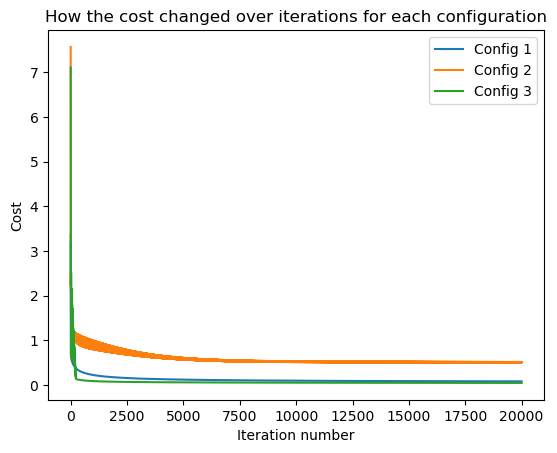

In [91]:
# Setting the learning rate and maximum number of iterations
iters = 20000
lr = 0.2

# Configuration (1) using petal measurements
# Initalise the model parameters with random values
W = np.array(np.random.randn(2,3))
b = np.array(np.random.randn(3))
# Train parameters by minimising the cost function
W_petal, b_petal, costs_petal = train(X_petal, y, lr, iters, W,b, print_cost = False)
print('This is the learned weight matrix for configuration 1')
print(W_petal)
print('This is the learned bias vector for configuration 1')
print(b_petal)

# Configuration (2) using sepal measurements
W = np.array(np.random.randn(2,3))
b = np.array(np.random.randn(3))
# Train parameters by minimising the cost function
W_sepal, b_sepal, costs_sepal = train(X_sepal, y, lr, iters, W,b, print_cost = False)
print('This is the learned weight matrix for configuration 2')
print(W_sepal)
print('This is the learned bias vector for configuration 2')
print(b_sepal)

# Configuration (3) using both petal and sepal measurements
# Initalise the model parameters with random values
W = np.array(np.random.randn(4,3))
b = np.array(np.random.randn(3))
# Train parameters by minimising the cost function
W_X, b_X, costs_X = train(X, y, lr, iters, W,b, print_cost = False)
print('This is the learned weight matrix for configuration 3')
print(W_X)
print('This is the learned bias vector for configuration 3')
print(b_X)

# Produce plots to show how the cost function values changed per iteration for each configuration
plt.plot(np.arange(0,iters,1), costs_petal, label = 'Config 1')
plt.plot(np.arange(0,iters,1), costs_sepal, label = 'Config 2')
plt.plot(np.arange(0,iters,1), costs_X, label = 'Config 3')
plt.legend()
plt.xlabel('Iteration number')
plt.ylabel('Cost')
plt.title('How the cost changed over iterations for each configuration')
plt.show()

##### (b) [3] For the first two configurations, plot the decision boundaries from the trained model: starting from the scatter plot in Q1, you should update the plot by adding the decision boundaries resulted from the trained model. Do the decision boundaries suggest a sensible classification rule? How do these decision boundaries compare with your drawing prediction in Q2?

b) Procedure to make the trained decision boundaries plots for configurations (1) and (2). 
- Create a grid of equally placed points stacked in a (nums$^2$, 2) numpy array with values between X petal/sepal length/width (cm) respectively
- Train parameters W and b using X petal\sepal data
- Predict the labels of every grid point using the learned parameters W and b using function `predict` (see below)
- Plot the dense set of grid points coloured by the predicted class for the decision boundary.
- Plot the scatter plot from question one on top of the decision boundary plot


In [16]:
def predict(W, b, X):
    """
    Predict the label using learned parameters (W, b)
    
    Arguments:
    w - weights, a numpy array of size 
    b - bias, a numpy array of size (num_class,1)
    X - data of size (num_meas, number of examples)
    
    Returns:
    y_prediction - a numpy array containing all predictions (0/1) for the examples in X
    
    """
    # Compute vector "A" predicting the probabilities.
    A = p_model(X, W, b)
    y_prediction=np.argmax(A, axis=1)
    return y_prediction

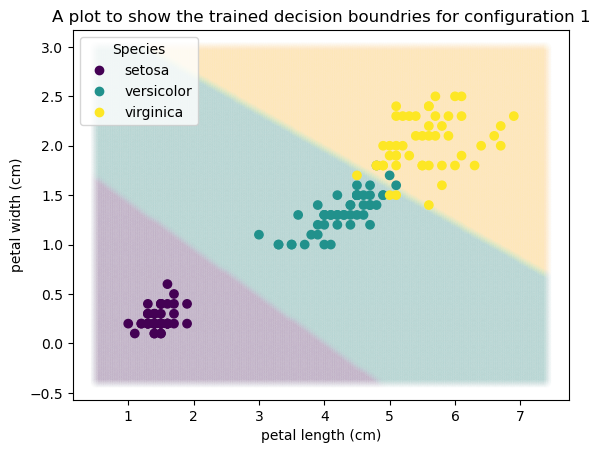

In [17]:
# initialise learning rate and maximum iterations
lr=0.2
iters=20000

# Create nums^2 (x0, x1) points on the grid [min(x0)-0.5, max(x0)+0.5] X [min(x1)-0.5, max(x1)+0.5]
num = 200
X0grid=np.linspace(X[:,2].min()-0.5, X[:,2].max()+0.5, num)
X1grid=np.linspace(X[:,3].min()-0.5, X[:,3].max()+0.5, num)
X0grid, X1grid = np.meshgrid(X0grid,X1grid)
X0grid = X0grid.reshape((np.prod(X0grid.shape),1))
X1grid = X1grid.reshape((np.prod(X1grid.shape),1))
Xgrid = np.hstack((X0grid,X1grid))

# Configuration (1) using petal measurements
# Initalise the model parameters with random values
W = np.array(np.random.randn(2,3))
b = np.array(np.random.randn(3))
# Train parameters by minimising the cost function
W_petal, b_petal, costs_petal = train(X_petal, y, lr, iters, W,b, print_cost = False)

# make predictions based for all nums^2 data points on grid [min(x0)-0.5, max(x0)+0.5] X [min(x1)-0.5, max(x1)+0.5] 
#using learned W and b 
y_pred=predict(W_petal, b_petal, Xgrid)
# Plot the learned decision boundries 
decision_boundaries = plt.scatter(Xgrid[:,0], Xgrid[:,1], c = y_pred, alpha=0.01)
# plot the features with known labels from the first question
measure_sepal = plt.scatter(X[:,2], X[:,3], c = y)
plt.xlabel(iris['feature_names'][2])
plt.ylabel(iris['feature_names'][3])
plt.title('A plot to show the trained decision boundries for configuration 1')
plt.legend(measure_sepal.legend_elements()[0], names, loc="upper left", title="Species")
plt.show()

For configuration 1, the decision boundaries certinally suggest a sensible classification rule. Since the data points are clustered and separated, it was expected for the decision boundaries to do a good job at seperating the clusters of data points. The decision boundary for classifying `setoa` from `versicolor` and `virginica` presented is arbitrarily identical to the the decision boundary predicted in question 2. However, the second line that splits `versicolor` and `virginica` presented is different to the line in question 2. This is because it does not perfectly segregate all the data points in `versicolor` from `virginica` in the data set.  

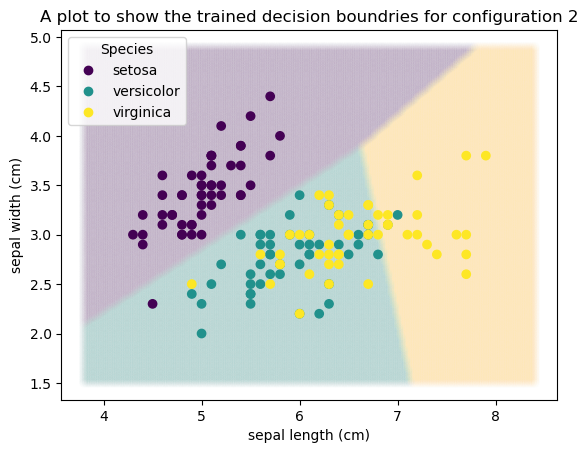

In [18]:
# initialise learning rate and maximum iterations
lr=0.2
iters=20000
# Create nums^2 (x0, x1) points on the grid [min(x0)-0.5, max(x0)+0.5] X [min(x1)-0.5, max(x1)+0.5]
num = 200
X0grid=np.linspace(X[:,0].min()-0.5, X[:,0].max()+0.5, num)
X1grid=np.linspace(X[:,1].min()-0.5, X[:,1].max()+0.5, num)
X0grid, X1grid = np.meshgrid(X0grid,X1grid)
X0grid = X0grid.reshape((np.prod(X0grid.shape),1))
X1grid = X1grid.reshape((np.prod(X1grid.shape),1))
Xgrid = np.hstack((X0grid,X1grid))

# Configuration (1) using petal measurements
# randomally choose initial W and b parameters
W = np.array(np.random.randn(2,3))
b = np.array(np.random.randn(3))
# Train parameters by minimising the cost function
W_sepal, b_sepal, costs_sepal = train(X_sepal, y, lr, iters, W,b, print_cost = False)

# make predictions based for all nums^2 data points on grid [min(x0)-0.5, max(x0)+0.5] X [min(x1)-0.5, max(x1)+0.5] 
#using learned W and b 
y_pred=predict(W_sepal, b_sepal, Xgrid)
decision_boundaries = plt.scatter(Xgrid[:,0], Xgrid[:,1], c = y_pred, alpha=0.01)
measure_sepal = plt.scatter(X[:,0], X[:,1], c = y)
plt.xlabel(iris['feature_names'][0])
plt.ylabel(iris['feature_names'][1])
plt.title('A plot to show the trained decision boundries for configuration 2')
plt.legend(
    measure_sepal.legend_elements()[0], names, loc="upper left", title="Species")


For configuration 2, the decision boundaries suggest a fairly sensible classification rule for classifying whether the species is `setosa` or `not setosa`. However, it does not do a good job at classifying the species if it is `not setosa` (whether the species is either `versicolor` or `virginica`). Therefore the decision boundary $\textbf{does not suggest a sensible classification rule}$ overall. The suggested decision boundary presented in question 2 was a straight line which perfectly classified `setoa` from `versicolor` and `virginica` for the data in the data set. Here, this is not the case since the decision boundary is a non-linear line that does not classify all `setosa` correctly. 

##### (c) [3] Compute the accuracy of the model for each configuration and comment on the results: Which configuration works best? Why? Does the behaviour of the cost function support this conclusion? 

c) Seeing how the model performs on unseen data is important; here are some reasons why,
- It provides oppitunities to detect underfitting and overfitting based on the training and testing accuracy
- It can help to determine whether the models decision boundaries work well on unseen data. If the model still works well, this is an indicator of a good classification rule.

In [19]:
def model(Xtrain, ytrain, Xtest, ytest, W, b, iters = 20000, lr = 0.2, print_cost = False, print_accuracy = True):
    """
    Builds the logistic regression model by calling the function you've implemented previously
    
    Arguments:
    X_train - training set represented by a numpy array of shape (3, m_train)
    Y_train - training labels represented by a numpy array (vector) of shape (1, m_train)
    X_test - test set represented by a numpy array of shape (3, m_test)
    Y_test - test labels represented by a numpy array (vector) of shape (1, m_test)
    iters - hyperparameter representing the number of iterations to optimize the parameters
    lr - hyperparameter representing the learning rate used in the update rule of train()
    print_cost - Set to true to print the cost every 100 iterations
    print_accuracy - Set to true to print the accuracy of the model 
    
    Returns:
    d - dictionary containing information about the model.
    """
    # Gradient descent
    [W, b, costs] = train(Xtrain, ytrain, lr, iters, W , b)
    # Predict test/train set examples
    Y_prediction_test = predict(W, b, Xtest)
    Y_prediction_train = predict(W, b, Xtrain)
    
    train_accuracy = np.mean(Y_prediction_train == ytrain)*100
    test_accuracy = np.mean(Y_prediction_test == ytest)*100
    
    if print_accuracy:
        # Print train/test Errors
        print("train accuracy: {} %".format(train_accuracy))
        print("test accuracy: {} %".format(test_accuracy))
    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "W" : W, 
         "b" : b,
         "learning_rate" : lr,
         "num_iterations": iters, 
         "train_accuracy": train_accuracy,
         "test_accuracy": test_accuracy}
    
    return d

In general, it is a good idea to partition 80-90% of the data into the training set, and the remaining 10-20% of the data into the testing set. Function `CreateDataPartitions` splits a data set $X$ into training and testing sets according to how many samples are required in the training set (`Npairs`), and the index start position of the random shuffle (`ind`) split (`i`). Setting `Npairs` to 30 would be a 80% training set and a 20% testing set. 

In [20]:
def CreateDataPartitions(X,y,Npairs,ind,i):
    """
    Function to create partitions from X and y data sets for training and testing
    
    Arguments:
    X - data of size (num_meas, number of examples)
    y - true "label" (containing 0 if setosa, 1 if Versicolor or 2 if Virginica)
    Npairs - number of partitions/folds
    ind - shuffled array of indicies of length m
    i - index to determine which of the Npairs of training and testing partitions to select
    
    Returns:
    Xtrain - training set represented by a numpy array of shape (3, m_train)
    ytrain - training labels represented by a numpy array (vector) of shape (1, m_train)
    Xtest - test set represented by a numpy array of shape (3, m_test)
    ytest - test labels represented by a numpy array (vector) of shape (1, m_test) 
    """
    # shuffle an array of indicies of length m
    # shuffle data pairs according to suffled indexes
    yrand = y[ind]
    Xrand = X[ind]
    # Choose a different part of the data for the test set
    yrand = np.roll(yrand,i*Npairs)
    Xrand = np.roll(Xrand,i*Npairs, axis = 0)
    # select N pairs to be the testing data set
    ytest = yrand[0:Npairs:]
    Xtest = Xrand[0:Npairs,:]
    # select the remaining pairs to be the training data set
    ytrain = yrand[ytest.shape[0]:yrand.shape[0]]
    Xtrain = Xrand[Xtest.shape[0]:Xrand.shape[0]]
    return Xtrain, Xtest, ytrain, ytest

Divide question 10(c) into subquestions 10(c)(I-IV) for clarity:

I) Compute the accuracy of the model for each configuration and comment on the results

II) Which configuration works best?

III) Why?

IV) Does the behaviour of the cost function support this conclusion? 

I) Now, lets compute some accuracies of the model for each configuration

In [81]:
# Generate randomally shuffled list of numbers from 0 to m-1 for input into `CreateDataPartitions` function
# to ensure a fair test, only one index shuffle is computed
m = X.shape[0]
ind = np.arange(m)
np.random.shuffle(ind)

In [82]:
# Configuration (1) using petal measurements
[Xtrain, Xtest, ytrain, ytest] = CreateDataPartitions(X_petal,y,30,ind,0)
W = np.array(np.random.randn(2,3))
b = np.array(np.random.randn(3))
print('For configuration 1')
d1 = model(Xtrain, ytrain, Xtest, ytest, W, b, iters = 20000, lr = 0.2, print_cost = False,print_accuracy= True)

For configuration 1
train accuracy: 98.33333333333333 %
test accuracy: 90.0 %


In [83]:
# Configuration (2) using sepal measurements
[Xtrain, Xtest, ytrain, ytest] = CreateDataPartitions(X_sepal,y,30,ind,0)
W = np.array(np.random.randn(2,3))
b = np.array(np.random.randn(3))
print('For configuration 2')
d2 = model(Xtrain, ytrain, Xtest, ytest, W, b, iters = 20000, lr = 0.2, print_cost = False)

For configuration 2
train accuracy: 81.66666666666667 %
test accuracy: 63.33333333333333 %


In [84]:
# Configuration (3) using both petal and sepal measurements
[Xtrain, Xtest, ytrain, ytest] = CreateDataPartitions(X,y,30,ind,0)
W = np.array(np.random.randn(4,3))
b = np.array(np.random.randn(3))
print('For configuration 3')
d3 = model(Xtrain, ytrain, Xtest, ytest, W, b, iters = 20000, lr = 0.2, print_cost = False)

For configuration 3
train accuracy: 100.0 %
test accuracy: 90.0 %


If there was a low training accuracy, that would imply that underfitting had occured. This normally happens if either the value of the cost function is still high at the maximum iteration, or the model is not a good fit for the data. If the difference between the training accuracy and the test accuracy is really high, this may imply overfitting (this implies that the model would lack generalisation). Observe
- Configuration 2 had the lowest training accuracy, and hence testing accuracy. From 10(b), it was discussed that the learned decision boundry was not a good fit for most of the data. Therefore, if we only had access to sepal data, it may be a good idea to try other types of models for classification to get a better fit. 
- Configurations 1 and 3 seem to perform very well. This is identified by the high training and testing accuracies. It was expected for Configuration 1 to work well since the learned decision boundary seemed to imply a good classification rule (10(b)). It was also expected for configuration 3 to perform at the very least as well as configuration 1 (see 10(c)(III) for an explanation of this)

II) In order to determine which configuration performs the best, it is a good idea to conduct multiple fair experiments using different training and testing examples. Since we have a small limited data set, cross validation could be a good idea since it will not be too expensive to implement, and it will help provide a idea on how well each configuration performs when the training data is varied.

For example: If a random shuffle produced a small train data set of predictions with true labels of prodomently `setosa`, one might expect all configurations to produce an okay training accuracy (cluster of `setosa` has more distinct petal/sepal lengths/widths, see Q1 and Q10(c)(III)). However, if the random shuffle produced a small train data set of predictions with true labels of prodomently `versicolor` and `virginica`, one might expect configuration 2 to not perform as well (see question 10b). Therefore, in order to judge performance, it maybe a good idea to compute multiple tests using testing sets sampled from the whole small limited data set. 

Also, it is worth noting that in general, cross validation is not necessarily a good metric on determining how well the model from each configuration will generalise outside the entire data set.

In [70]:
def CrossValidation(X,y,Npairs,ind,config_ind,iters,lr,print_cost = False, print_accuracy = False):
    """
    Function to perform k-fold cross validation from machine learning 1
    
    Arguments:
    X - data of size (num_meas, number of examples)
    y - true "label" (containing 0 if setosa, 1 if Versicolor or 2 if Virginica)
    Npairs - number of partitions/folds
    ind - shuffled array of indicies of length m 
    config_ind - configuration indicator variable for neseccary weight dimensions
    iters - hyperparameter representing the number of iterations to optimize the parameters
    lr - hyperparameter representing the learning rate used in the update rule of train()
    print_cost - Set to true to print the cost every 100 iterations
    print_accuracy - Set to true to print the accuracy of the model 
    
    Returns:
    training_accuracy - vector of different computed training accuracies
    testing_accuracy - vector of different computed testing accuracies
    """
    #initialise training and testing arrays
    train_accuracy = []
    test_accuracy = []
    # loop over each partition combination
    for i in range(int(X.shape[0]/Npairs)):
        # generate traning and testing sets according to the ith split
        [Xtrain, Xtest, ytrain, ytest] = CreateDataPartitions(X,y,Npairs,ind,i)
        # initialise learning parameters W and b 
        W = np.array(np.random.randn(config_ind,3))
        b = np.array(np.random.randn(3))
        # compute training and testing accuracies
        d = model(Xtrain, ytrain, Xtest, ytest, W, b, iters = 20000, lr = 0.2, print_cost = False, print_accuracy = False)
        # append computed accuracies to correct vectors initalised before loop
        train_accuracy.append(d['train_accuracy'])
        test_accuracy.append(d['test_accuracy'])
    return train_accuracy, test_accuracy

In [ ]:
# Generate randomally shuffled list of numbers from 0 to m-1 for input into `CreateDataPartitions` function
# to ensure a fair test, only one index shuffle is computed
m = X.shape[0]
ind = np.arange(m)
np.random.shuffle(ind)

In [68]:
# Configuration (1) using petal measurements
train_accuracy_1, test_accuracy_1=CrossValidation(X_petal,y,30,ind,2,iters,lr,print_cost = False, print_accuracy = False)
print('Average training accuracy for configuration 1: {} %'.format(np.mean(train_accuracy_1)))
print('Average testing accuracy for configuration 1: {} %'.format(np.mean(test_accuracy_1)))

Average training accuracy for configuration 1: 96.00000000000001 %
Average testing accuracy for configuration 1: 95.33333333333333 %


In [69]:
# Configuration (2) using sepal measurements
train_accuracy_2, test_accuracy_2=CrossValidation(X_sepal,y,30,ind,2,iters,lr,print_cost = False, print_accuracy = False)
print('Average training accuracy for configuration 2: {} %'.format(np.mean(train_accuracy_2)))
print('Average testing accuracy for configuration 2: {} %'.format(np.mean(test_accuracy_2)))

Average training accuracy for configuration 2: 75.16666666666666 %
Average testing accuracy for configuration 2: 76.66666666666667 %


In [67]:
# Configuration (3) using both petal and sepal measurements
train_accuracy_3, test_accuracy_3=CrossValidation(X,y,30,ind,4,iters,lr,print_cost = False, print_accuracy = False)
print('Average training accuracy for configuration 3: {} %'.format(np.mean(train_accuracy_3)))
print('Average testing accuracy for configuration 3: {} %'.format(np.mean(test_accuracy_3)))

Average training accuracy for configuration 3: 98.5 %
Average testing accuracy for configuration 3: 96.66666666666666 %


Configuration has the highest average training and testing accuracy. Therefore, configuration 3 performs the best, followed closely by configuration 1. 

III) It was expected for configuration 3 to have the best performance. This is because the inclusion of more features can help the model perform better on unseen examples. It is perfectly reasonable to assume that there may be relationships between petal lengths vs sepal widths, and vice versa. The plot below shows that there are clusters of data points for petal widths/lengths and sepal widths/lengths; with a spacially distinct cluser of `setosa`. Limiting the models features to only comparing sepal widths vs sepal lengths, and petal widths vs petal lengths, exclusively can certinally be limiting. Hence, configuration (3) perfoming better, since it is able to complete classification by capturing all of these interactions as well.

Text(0.5, 0.98, 'Scatter plots to show relationships between sepal widths/lengths and petal widths/lengths')

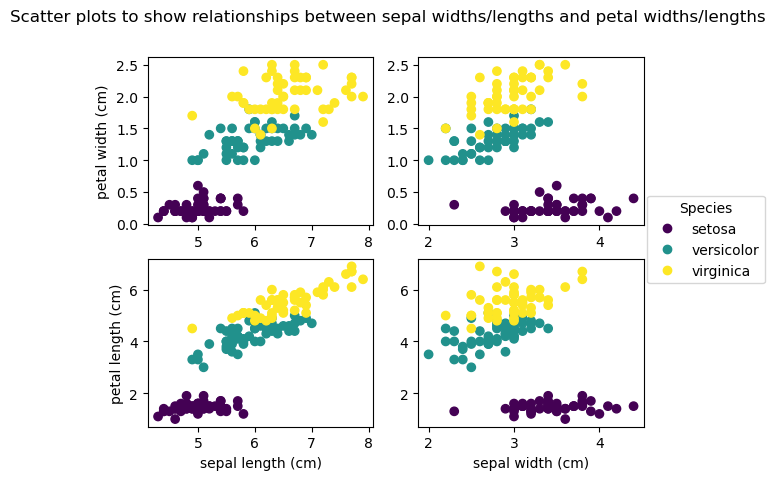

In [80]:
fig, ax = plt.subplots(2,2)
ax[0, 0].scatter(X[:,0], X[:,3], c = y)
ax[0, 0].set_ylabel(iris['feature_names'][3])
ax[0, 1].scatter(X[:,1], X[:,3], c = y)   
ax[1,0].scatter(X[:,0], X[:,2], c = y)
ax[1,0].set_xlabel(iris['feature_names'][0])
ax[1,0].set_ylabel(iris['feature_names'][2])
ax[1,1].scatter(X[:,1], X[:,2], c = y)
ax[1,1].set_xlabel(iris['feature_names'][1])
fig.legend(measure_sepal.legend_elements()[0], names, loc="outside right center",bbox_to_anchor=(1.1, 0.5), title="Species")
fig.suptitle('Scatter plots to show relationships between sepal widths/lengths and petal widths/lengths')

IV) The cost function measures how well each configuration for the model performs during training/learning the parameters $W$ and $b$.

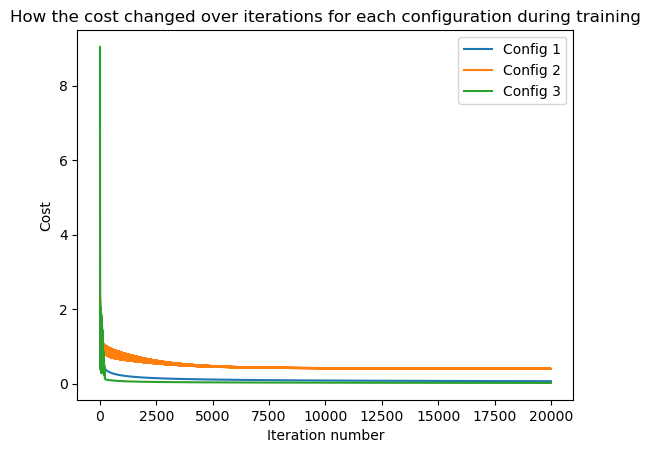

In [90]:
# Produce plots to show how the cost function values changed per iteration for each configuration
plt.plot(np.arange(0,iters,1), d1['costs'], label = 'Config 1')
plt.plot(np.arange(0,iters,1), d2['costs'], label = 'Config 2')
plt.plot(np.arange(0,iters,1), d3['costs'], label = 'Config 3')
plt.legend()
plt.xlabel('Iteration number')
plt.ylabel('Cost')
plt.title('How the cost changed over iterations for each configuration during training')
plt.show()

For configuration 3, observe that as the number of iterations increases, the value of the cost function at each iteration decreases the most, whilst configuration (2) decreases the value of the cost function the least at each iteration. Configuration (3) is the best at learning the parameters $W$ and $b$ per iteration. Therefore, the behaviour of the cost function certinally supports the conclusion that configuration (3) performs the best.  